In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import math
from ChK.ChK_analysis import list_colors

In [3]:
# Read only sheet 'inact_recov' from 'channel_data_densities.xlsx'
df_in = pd.read_excel('../data/channel_data_densities.xlsx', sheet_name = 'inact_recov')
df_in.head(3)

,cell,0.005,0.01,0.015,0.02,0.025,0.03,0.035,0.04,0.045,0.05,0.1,0.2,0.3,0.4,0.5,1.0,2.0,3.0,4.0
0,Ctgf-T2A-dgCre;Ai14-496566.03.01.01,37.108414,64.991577,67.108887,80.865982,79.933899,69.567017,87.260780,91.084908,105.832695,74.280243,104.682518,110.088181,118.944656,108.080292,121.089233,144.783600,244.778900,171.913696,225.752930
1,Rbp4-Cre_KL100;Ai14-658999.10.09.02,57.255615,79.855545,92.675095,137.106491,134.252213,121.375031,173.332413,158.354218,211.182159,251.758530,339.256348,467.023682,559.611450,635.904724,722.881104,957.883057,1113.257202,1146.621460,1202.392334
2,Ctgf-T2A-dgCre;Ai14-509689.04.02.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Count missing values per row
missing_vals_per_row = df_in.isna().sum(axis=1)
missing_mask = missing_vals_per_row < 10

# Exclude cells with less than 10 points
df_val = df_in[missing_mask]
df_val = df_val.reset_index(drop=True)
df_val.head(3)

,cell,0.005,0.01,0.015,0.02,0.025,0.03,0.035,0.04,0.045,0.05,0.1,0.2,0.3,0.4,0.5,1.0,2.0,3.0,4.0
0,Ctgf-T2A-dgCre;Ai14-496566.03.01.01,37.108414,64.991577,67.108887,80.865982,79.933899,69.567017,87.260780,91.084908,105.832695,74.280243,104.682518,110.088181,118.944656,108.080292,121.089233,144.783600,244.778900,171.913696,225.752930
1,Rbp4-Cre_KL100;Ai14-658999.10.09.02,57.255615,79.855545,92.675095,137.106491,134.252213,121.375031,173.332413,158.354218,211.182159,251.758530,339.256348,467.023682,559.611450,635.904724,722.881104,957.883057,1113.257202,1146.621460,1202.392334
2,H19.03.305.11.10.01.10,47.957359,60.728172,90.057083,136.846390,149.084198,144.045944,148.534027,217.594818,204.628784,238.229660,359.334442,539.700012,709.718262,762.493225,888.716187,1100.304565,1188.993774,NaN,NaN


### Plotting inactivation recovery for all species

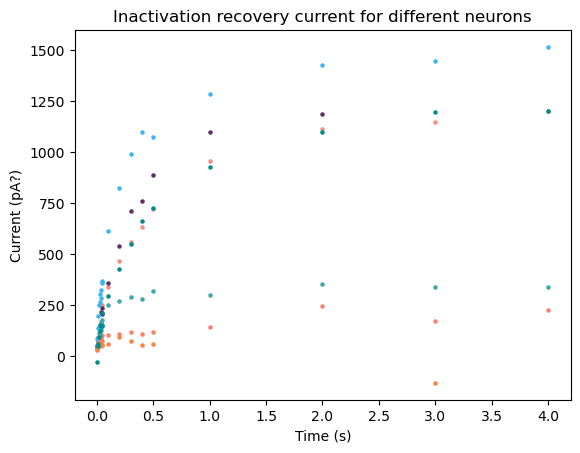

In [5]:
# plot 
times = [ '0.005', '0.01', '0.015', '0.02', '0.025', '0.03',
         '0.035', '0.04', '0.045', '0.05', '0.1', '0.2', '0.3',
         '0.4', '0.5', '1.0', '2.0', '3.0', '4.0']

n_cells_to_plot = 7

color_list = list_colors(n_cells_to_plot)

for cell in range(n_cells_to_plot): # df_val.shape[0] to plot all points, takes more than 2 mins
    for time in times:
        if math.isnan(df_val[time][cell]):
            continue
        else:
            plt.scatter(float(time), df_val[time][cell], color=color_list[cell], s=5)
plt.ylabel('Current (pA?)')
plt.xlabel('Time (s)')
plt.title('Inactivation recovery current for different neurons')
plt.show()


#### Plotting Normalized inactivation recovery for all species

C:\Users\maria.vergara\AppData\Local\Temp\ipykernel_11704\1730162060.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  max_vals = df_val.max(axis=1)


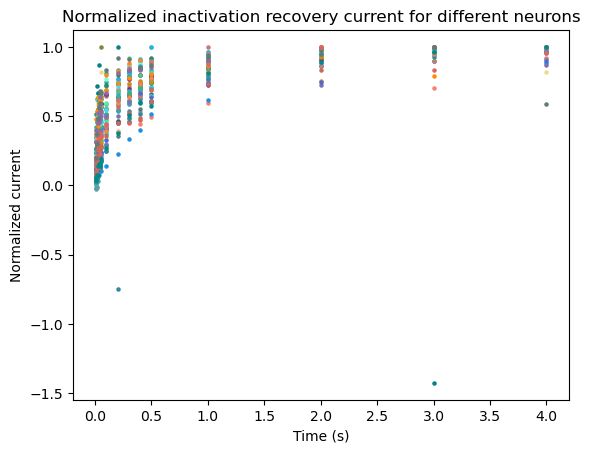

In [6]:
# Plot normalized to each maximum
max_vals = df_val.max(axis=1)

n_cells_to_plot = 50

color_list = list_colors(n_cells_to_plot)

for cell in range(n_cells_to_plot): # df_val.shape[0]
    for time in times:
        # print(f'Time:{time}, cell:{cell}, val:{math.isnan(df_val[time][cell])}')
        if math.isnan(df_val[time][cell]):
            continue
        else:
            plt.scatter(float(time), df_val[time][cell]/max_vals[cell], color=color_list[cell], s=5)
            
plt.ylabel('Normalized current')
plt.xlabel('Time (s)')
plt.title('Normalized inactivation recovery current for different neurons')
plt.show()


In [7]:
# Another way to sort human with regex
pattern = r'^H[0-9]\d'
df_pattern_H = df_val.copy()
df_reg_H = df_pattern_H[df_pattern_H['cell'].str.contains(pattern, regex=True)]
df_reg_H= df_reg_H.reset_index(drop=True)
# df_reg_H.head(3), df_reg_H.shape


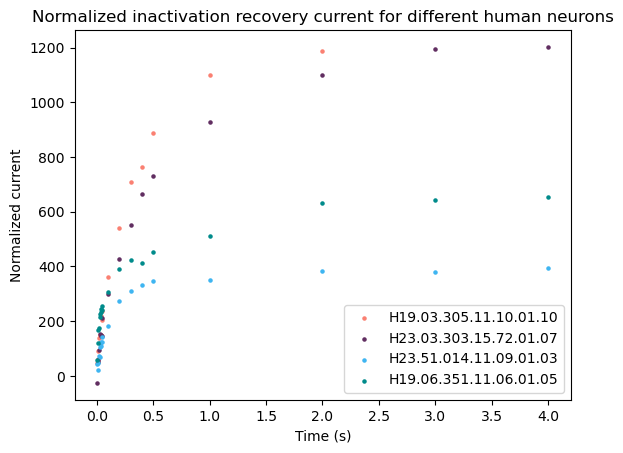

In [8]:
# # Plot normalized to each maximum
# max_vals = df_reg_H.max(axis=1)

n_cells_to_plot = 4

color_list = list_colors(n_cells_to_plot)

times = [ '0.005', '0.01', '0.015', '0.02', '0.025', '0.03',
         '0.035', '0.04', '0.045', '0.05', '0.1', '0.2', '0.3',
         '0.4', '0.5', '1.0', '2.0', '3.0', '4.0']

used_labels = set()

for cell in range(n_cells_to_plot): # df_reg_H.shape[0]
    for time in times:
        # print(f'Time:{time}, cell:{cell}, val:{math.isnan(df_reg_H[time][cell])}')
        if math.isnan(df_reg_H[time][cell]):
            continue
        else:
            if df_reg_H['cell'][cell] not in used_labels:
                plt.scatter(float(time), df_reg_H[time][cell], color=color_list[cell], s=5,
                        label=f"{df_reg_H['cell'][cell]}") #normalize /max_vals[cell]
                used_labels.add(df_reg_H['cell'][cell])
            else: #no label
                plt.scatter(float(time), df_reg_H[time][cell], color=color_list[cell], s=5)
                
plt.ylabel('Normalized current')
plt.xlabel('Time (s)')
plt.title('Normalized inactivation recovery current for different human neurons')
plt.legend()
plt.show()


### Merge data with human dataset
Merge incat_recov with locked_jeremys_data_SEAAD_240822.csv which contains the ttype morphology for human cells. Using the following assignments:
- HANN_class_subclass_label.assignment	
- HANN_class_cluster_label.assignment 
- HANN_class_label.assignment_x

In [9]:
# Read human ttype dataset
human_ttypes = pd.read_csv('../data/SEAAD_240904_MMC_HANN_rsc369.csv')  #locked_jeremys_data_SEAAD_240822.csv or SEAAD_240904_MMC_HANN_rsc369.csv
human_ttypes.head(3)

,seq-name,cell_id,patched_cell_container_label,cell_name_label,batch_vendor_name_label,SEAAD_class_label.assignment,SEAAD_class_label.bootstrapping_probability,SEAAD_class_label.avg_correlation,SEAAD_subclass_label.assignment,SEAAD_subclass_label.bootstrapping_probability,...,Tree_second_KL,seuratQCpass,UMAP_x,UMAP_y,class_MapMyCells,class_MapMyCells_softmax_probability,subclass_MapMyCells,subclass_MapMyCells_softmax_probability,supertype_MapMyCells,supertype_MapMyCells_softmax_probability
0,SM-GE62S_S097_E1-50,616836450,P2S4_170906_051_A01,H17.03.012.11.16.01,RSC-122,Neuronal: GABAergic,1.00,0.295518,Vip,0.96,...,7.749679,False,0.408320,0.714792,Non-neuronal and Non-neural,0.9954,Astrocyte,0.992,Astro_2,0.992
1,SM-GE62S_S098_E1-50,616840597,P2S4_170906_052_A01,H17.03.012.11.16.02,RSC-122,Neuronal: GABAergic,0.99,0.197187,Pvalb,0.82,...,4.700320,False,-0.060571,1.742508,Neuronal: GABAergic,0.9999,Pvalb,0.9996,Pvalb_15,0.9996
2,SM-GE62S_S099_E1-50,616858807,P2S4_170906_053_A01,H17.03.012.11.16.03,RSC-122,Neuronal: GABAergic,1.00,0.274666,Pvalb,0.79,...,9.394618,False,-0.021292,1.271244,Neuronal: Glutamatergic,0.9652,L5 IT,0.8265,L5 IT_7,0.8265


In [10]:
# Merge data files by 'jem-id_patched_cell_container' & 'Sample ID'
df_human = pd.merge(left = df_val, left_on = 'cell',
            right = human_ttypes, right_on = 'cell_name_label', how = 'inner')

df_human.sort_values('cell');
df_human.shape

(99, 100)

The excel 'channel_data_densities.xlsx' contained about 103 Human codes for which there where at least 10 initial points. However the merging process ended up with only 42 rows. (Could be the codes are not in ttype spreadsheet).

The expected 103 human cells were:

<sub>
codes = [
    "H18.03.322.11.10.01.04",    "H18.03.322.11.10.01.05",    "H19.03.305.11.10.01.02",    "H19.03.305.11.10.01.03",    "H19.03.305.11.10.01.05",    "H19.03.305.11.10.01.10",    "H19.03.306.11.12.01.02",    "H19.03.306.11.12.01.05",    "H19.03.306.11.12.01.06",    "H19.03.306.11.12.01.09",    "H19.03.306.11.16.01.02",    "H19.03.308.11.04.01.04",    "H19.03.308.11.04.01.07",    "H19.03.309.11.08.02.01",    "H19.03.309.11.08.02.03",    "H19.03.309.11.08.02.04",    "H19.03.309.11.08.02.05",    "H19.03.309.11.08.02.06",    "H19.03.310.11.04.02.04",    "H19.03.310.11.06.02.01",    "H19.03.310.11.06.02.02",    "H19.03.310.11.06.02.04",    "H19.03.310.11.06.02.05",    "H19.03.311.14.05.01.01",    "H19.03.311.14.05.01.04",    "H19.03.311.14.05.01.06",    "H19.03.311.14.08.01.02",    "H19.03.312.11.04.01.02",    "H19.03.312.11.04.01.03",    "H19.03.313.11.13.01.01",    "H19.03.313.11.13.01.03",    "H19.03.314.12.07.01.03",    "H19.03.315.11.01.01.04",    "H19.03.315.11.01.01.06",    "H19.03.315.11.01.01.07",    "H19.03.315.11.05.01.02",    "H19.03.319.11.04.01.01",    "H19.03.319.11.04.01.02",    "H19.03.320.11.13.01.03",    "H19.06.351.11.06.01.01",    "H19.06.351.11.06.01.04",    "H19.06.351.11.06.01.05",    "H19.06.351.11.06.01.06",    "H19.06.351.11.06.01.07",    "H19.06.351.11.06.01.08",    "H19.06.351.11.06.01.09",    "H19.06.351.11.16.02.01",    "H22.06.356.11.51.01.03",    "H22.26.433.11.54.01.05",    "H22.26.434.11.63.01.03",    "H22.26.435.11.53.01.07",    "H22.26.436.11.60.01.05",    "H22.26.437.11.51.01.01",    "H22.26.437.11.51.01.03",    "H22.26.437.11.57.01.01",    "H23.03.302.11.05.01.02",    "H23.03.302.11.05.01.04",    "H23.03.302.11.05.01.06",    "H23.03.302.11.08.01.01",    "H23.03.302.11.09.01.02",    "H23.03.302.11.09.01.03",    "H23.03.303.12.06.01.01",    "H23.03.303.12.62.01.02",    "H23.03.303.15.72.01.07",    "H23.03.304.11.51.01.05",    "H23.03.305.11.52.01.03",    "H23.03.305.11.52.01.10",    "H23.03.305.11.65.01.02",    "H23.03.305.11.65.01.03",    "H23.03.307.11.60.08",    "H23.03.307.12.63.03",    "H23.03.308.11.60.01.02",    "H23.03.309.11.54.08",    "H23.03.309.11.61.05",    "H23.03.309.12.62.09",    "H23.06.351.11.54.01.03",    "H23.51.001.11.04.01.04",    "H23.51.001.11.10.02.01",    "H23.51.001.11.10.02.03",    "H23.51.001.11.13.01.05",    "H23.51.002.11.09.01.01",    "H23.51.002.11.09.01.03",    "H23.51.002.11.09.01.04",    "H23.51.002.11.51.01.01",    "H23.51.004.11.06.01.01",    "H23.51.007.11.03.01.05",    "H23.51.008.11.04.01.03",    "H23.51.010.21.04.01.01",    "H23.51.010.21.05.01.03",    "H23.51.010.21.58.01.02",    "H23.51.014.11.09.01.03",    "H23.51.015.11.04.01.09",    "H23.51.015.11.51.01.02",    "H23.51.015.11.51.01.03",    "H23.51.016.11.07.01.02",    "H23.51.018.11.53.01.04",    "H24.03.302.11.51.01.02",    "H24.06.352.11.05.01.03",    "H24.06.352.11.06.01.01",    "H24.06.352.11.06.01.04",    "H24.26.402.11.67.01.02",    "H24.51.001.11.09.01.06",    "H24.51.004.11.51.01.01"
]

] </sub>

In [11]:
df_human.to_excel('test_human_merge.xlsx', index=False)

In [12]:
# # just to test the outer values (not included in both datasets)
# df_human_outer = pd.merge(left = df_val, left_on = 'cell',
#             right = human_ttypes, right_on = 'cell_name_label', how = 'outer')

# df_human_outer.to_excel('test_human_merge_outer.xlsx', index=False)

### t-types columns
- SEAAD_class_label.assignment (esta rara la clasificacion, dice neural al principio - Neuronal: GABAergic-)
- SEAAD_subclass_label.assignment  Sst, Sst, Sst Chodl, L5 IT
- SEAAD_cluster_label.assignment

Clasificar por glutamatergic y GABAergic, luego promedio glut y GABA

In [13]:
unique_subclass = df_human['SEAAD_subclass_label.assignment'].unique()
unique_subclass, len(unique_subclass)

(array(['Sst', 'Sst Chodl', 'L5 IT', 'Vip', 'L2/3 IT', 'L4 IT', 'Lamp5',
        'L6 CT', 'Sncg', 'Pvalb', 'L6 IT Car3', 'Pax6', 'L5/6 NP', 'L5 ET',
        'L6b', 'L6 IT'], dtype=object),
 16)

How many cells per each subclass

In [14]:
subclass_count = {}
total_counts = 0
for subclass in unique_subclass:
    subclass_mask = df_human['SEAAD_subclass_label.assignment'] == subclass
    subclass_count[subclass] = sum(subclass_mask)
    total_counts = total_counts + sum(subclass_mask)
subclass_count, total_counts

({'Sst': 10,
  'Sst Chodl': 5,
  'L5 IT': 15,
  'Vip': 5,
  'L2/3 IT': 10,
  'L4 IT': 13,
  'Lamp5': 9,
  'L6 CT': 5,
  'Sncg': 7,
  'Pvalb': 8,
  'L6 IT Car3': 4,
  'Pax6': 3,
  'L5/6 NP': 2,
  'L5 ET': 1,
  'L6b': 1,
  'L6 IT': 1},
 99)

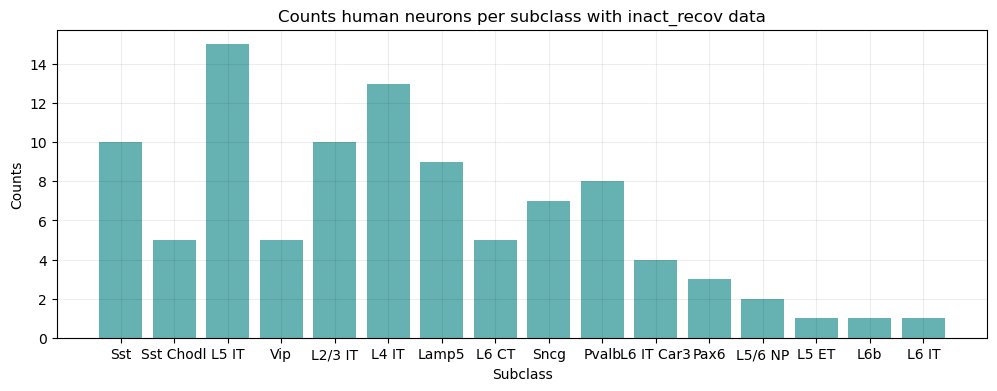

In [15]:
plt.figure(figsize=(12,4))
plt.bar(subclass_count.keys(), subclass_count.values(), color='teal', alpha=0.6)
plt.title('Counts human neurons per subclass with inact_recov data')
plt.xlabel('Subclass')
plt.ylabel('Counts')
plt.grid(color='black', alpha=0.07)

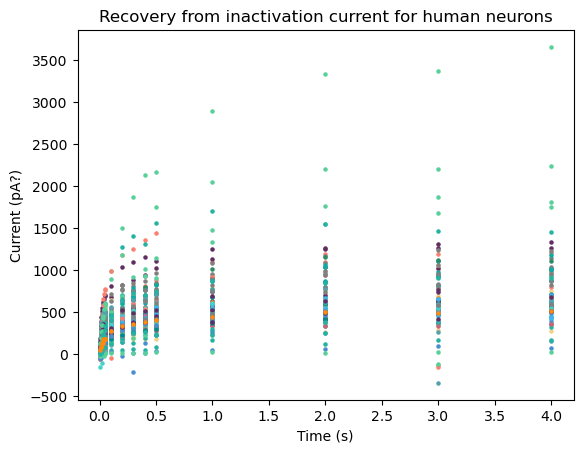

In [16]:
# plot 
times = [ '0.005', '0.01', '0.015', '0.02', '0.025', '0.03',
         '0.035', '0.04', '0.045', '0.05', '0.1', '0.2', '0.3',
         '0.4', '0.5', '1.0', '2.0', '3.0', '4.0']

unique_subclass = df_human['SEAAD_subclass_label.assignment'].unique()
n_subclasses = len(unique_subclass)
n_cells_to_plot = df_human.shape[0]


color_list = list_colors(n_subclasses)
color_dict = {subclass: color_list[index] for index, subclass in enumerate(unique_subclass)}

for cell in range(n_cells_to_plot): # df_val.shape[0] to plot all points, takes more than 2 mins
    for time in times:
        if math.isnan(df_human[time][cell]):
            continue
        else:
            plt.scatter(float(time), df_human[time][cell], s=5,
                        color=color_dict[df_human['SEAAD_subclass_label.assignment'][cell]])
            
plt.ylabel('Current (pA?)')
plt.xlabel('Time (s)')
plt.title('Recovery from inactivation current for human neurons')
plt.show()

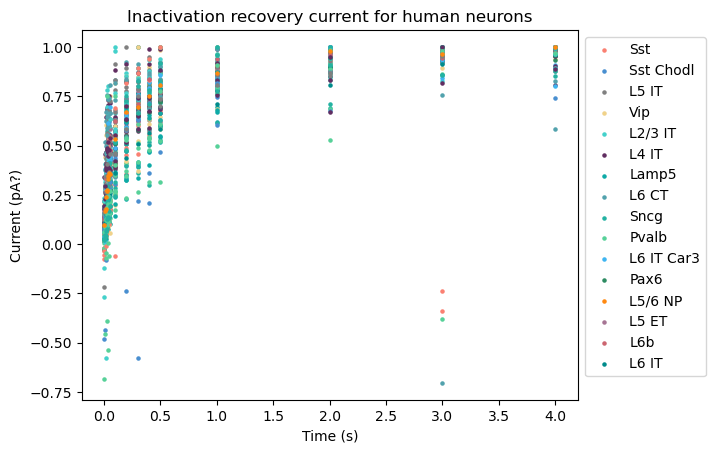

In [17]:
# plot 
times = [ '0.005', '0.01', '0.015', '0.02', '0.025', '0.03',
         '0.035', '0.04', '0.045', '0.05', '0.1', '0.2', '0.3',
         '0.4', '0.5', '1.0', '2.0', '3.0', '4.0']

# Max vals for normalization
# Plot normalized to each maximum
max_curr_time = df_human[times].max(axis=1)

unique_subclass = df_human['SEAAD_subclass_label.assignment'].unique()
n_subclasses = len(unique_subclass)
n_cells_to_plot = df_human.shape[0]

color_list = list_colors(n_subclasses)
color_dict = {subclass: color_list[index] for index, subclass in enumerate(unique_subclass)}

used_labels = set()

for cell in range(n_cells_to_plot): # df_val.shape[0] to plot all points, takes more than 2 mins
    for time in times:
        if math.isnan(df_human[time][cell]):
            continue
        else:
            if df_human['SEAAD_subclass_label.assignment'][cell] not in used_labels:
                plt.scatter(float(time), df_human[time][cell]/max_curr_time[cell], s=5,
                        color=color_dict[df_human['SEAAD_subclass_label.assignment'][cell]],
                        label=df_human['SEAAD_subclass_label.assignment'][cell])
                used_labels.add(df_human['SEAAD_subclass_label.assignment'][cell])
            else:
                plt.scatter(float(time), df_human[time][cell]/max_curr_time[cell], s=5,
                        color=color_dict[df_human['SEAAD_subclass_label.assignment'][cell]])
            
plt.ylabel('Current (pA?)')
plt.xlabel('Time (s)')
plt.title('Inactivation recovery current for human neurons')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### Plotting mean human by subclass

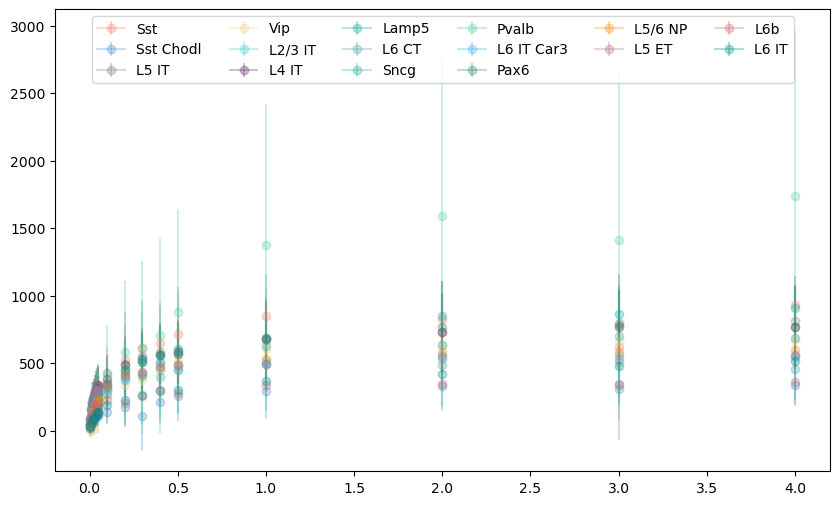

31.43993377685547


In [18]:
color_list = list_colors(n_subclasses)
color_dict = {subclass: color_list[index] for index, subclass in enumerate(unique_subclass)}

used_labels = set()

plt.figure(figsize=(10, 6))
for subclass in unique_subclass:
    filter_subclass = (df_human['SEAAD_subclass_label.assignment'] == subclass)
    df_subclass_H = df_human[filter_subclass]
    mean_subclass_H = df_subclass_H[times].mean(axis=0)
    std_subclass_H = df_subclass_H[times].std(axis=0)
    
    
    for index, time in enumerate(times):
        if subclass not in used_labels:
            plt.errorbar(float(time), mean_subclass_H[index], yerr=std_subclass_H[index],
                     label=subclass, color=color_dict[subclass],fmt='-o', alpha=0.3 )
            used_labels.add(subclass)
        else:
            plt.errorbar(float(time), mean_subclass_H[index], yerr=std_subclass_H[index],
                      color=color_dict[subclass],fmt='-o', alpha=0.3 )
    

plt.legend(ncol=6, loc='upper center')
plt.show()
print(mean_subclass_H[0])

but this has no normalization of currents for each cell, so is not comparable

### Create a normalized df for human, includes ttype, cell_ID, and time currents normalized for each cell

In [19]:
df_normalized_human = pd.DataFrame()
max_curr_time = df_human[times].max(axis=1)
df_normalized_human = df_human[['cell_name_label','SEAAD_class_label.assignment',
                               'SEAAD_subclass_label.assignment', 'SEAAD_cluster_label.assignment'
                               ]]
times = [ '0.005', '0.01', '0.015', '0.02', '0.025', '0.03',
         '0.035', '0.04', '0.045', '0.05', '0.1', '0.2', '0.3',
         '0.4', '0.5', '1.0', '2.0', '3.0', '4.0']
for cell in range(df_human.shape[0]):
    for time_col in times:
        df_normalized_human.loc[cell,time_col] = df_human.loc[cell, time_col]/max_curr_time[cell]
        
    
df_normalized_human

C:\Users\maria.vergara\AppData\Local\Temp\ipykernel_11704\1292945034.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalized_human.loc[cell,time_col] = df_human.loc[cell, time_col]/max_curr_time[cell]
C:\Users\maria.vergara\AppData\Local\Temp\ipykernel_11704\1292945034.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalized_human.loc[cell,time_col] = df_human.loc[cell, time_col]/max_curr_time[cell]
C:\Users\maria.vergara\AppData\Local\Temp\ipykernel_11704\1292945034.py:11: SettingWithC

,cell_name_label,SEAAD_class_label.assignment,SEAAD_subclass_label.assignment,SEAAD_cluster_label.assignment,0.005,0.01,0.015,0.02,0.025,0.03,...,0.05,0.1,0.2,0.3,0.4,0.5,1.0,2.0,3.0,4.0
0,H19.03.305.11.10.01.10,Neuronal: GABAergic,Sst,Sst_19,0.040334,0.051075,0.075742,0.115094,0.125387,0.121149,...,0.200362,0.302217,0.453913,0.596907,0.641293,0.747452,0.925408,1.000000,NaN,NaN
1,H23.03.303.15.72.01.07,Neuronal: GABAergic,Sst,Sst_19,-0.021689,0.042746,0.048291,0.078882,0.100998,0.127414,...,0.176090,0.247546,0.354886,0.457135,0.551837,0.606066,0.771503,0.913853,0.994429,1.000000
2,H23.51.014.11.09.01.03,Neuronal: GABAergic,Sst Chodl,Sst Chodl_1,0.108024,0.123490,0.053504,0.188140,0.179206,0.265876,...,0.316959,0.462888,0.695603,0.787314,0.843648,0.883378,0.892283,0.980240,0.968811,1.000000
3,H19.06.351.11.06.01.05,Neuronal: Glutamatergic,L5 IT,L5 IT_2,0.090827,0.184947,0.257603,0.265074,0.328457,0.344913,...,0.365954,0.465457,0.598542,0.646303,0.627983,0.691854,0.779632,0.963758,0.980302,1.000000
4,H23.03.308.11.60.01.02,Neuronal: GABAergic,Vip,Vip_16,0.101221,0.145233,0.214569,0.267038,0.230899,0.277871,...,0.383757,0.475511,0.577765,0.644850,0.636367,0.645427,0.816546,0.907114,1.000000,0.965630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,H19.03.314.12.07.01.03,Neuronal: Glutamatergic,L5 IT,L5 IT_2,0.096747,0.178063,0.343819,0.263200,0.351612,0.408297,...,0.459025,0.457512,0.583323,0.750630,0.706363,0.699213,0.805903,0.868789,0.980818,1.000000
95,H19.03.309.11.08.02.04,Neuronal: GABAergic,Sncg,Sncg_6,0.025521,0.044102,0.078434,0.124696,0.213918,0.242489,...,0.191200,0.314318,0.475343,0.664039,0.709187,0.629285,0.776633,1.000000,NaN,NaN
96,H24.51.004.11.51.01.01,Neuronal: GABAergic,Pvalb,Pvalb_2,0.058853,0.087176,0.120477,0.125538,0.152986,0.190002,...,0.270129,0.399129,0.528349,NaN,NaN,0.778469,0.910559,0.982026,0.979869,1.000000
97,H19.03.308.11.04.01.07,Neuronal: GABAergic,Sncg,Sncg_5,0.022300,0.043682,0.042918,0.068103,0.078751,0.126938,...,0.194383,0.241962,0.748943,0.826407,0.770275,0.917682,1.000000,0.908554,0.858126,0.854272


In [20]:
color_list = list_colors(n_subclasses)
color_dict = {subclass: color_list[index] for index, subclass in enumerate(unique_subclass)}

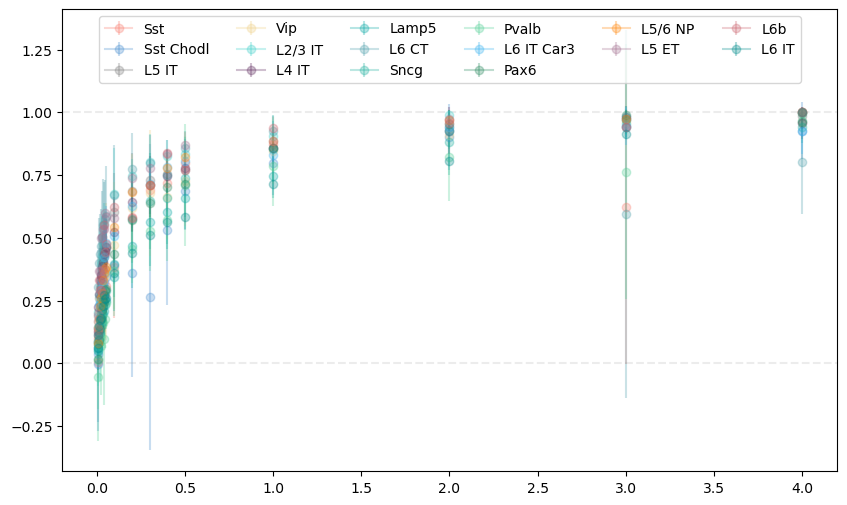

0.06058487520697297


In [21]:
used_labels = set()

plt.figure(figsize=(10, 6))
for subclass in unique_subclass:
    filter_subclass = (df_normalized_human['SEAAD_subclass_label.assignment'] == subclass)
    df_subclass_H = df_normalized_human[filter_subclass]
    mean_subclass_H = df_subclass_H[times].mean(axis=0)
    std_subclass_H = df_subclass_H[times].std(axis=0)
    
    
    for index, time in enumerate(times):
        if subclass not in used_labels:
            plt.errorbar(float(time), mean_subclass_H[index], yerr=std_subclass_H[index],
                     label=subclass, color=color_dict[subclass],fmt='-o', alpha=0.3 )
            used_labels.add(subclass)
        else:
            plt.errorbar(float(time), mean_subclass_H[index], yerr=std_subclass_H[index],
                      color=color_dict[subclass],fmt='-o', alpha=0.3 )
    
plt.axhline(y=0,color='gray',linestyle='--', alpha=0.15)
plt.axhline(y=1,color='gray',linestyle='--', alpha=0.15)
plt.legend(ncol=6, loc='upper center')
plt.show()
print(mean_subclass_H[0])

#### Plot by subclass

In [22]:
#plot one cell and retrieve a list of the currents and time (useful for fitting later each cell)
def plot_and_array_current_0(data, cell_index, plot=False, scatter_plot=False,
                             group = 'SEAAD_subclass_label.assignment', alpha=0.4,
                             linewidth=0.8):
    
    times = [ '0.005', '0.01', '0.015', '0.02', '0.025', '0.03',
         '0.035', '0.04', '0.045', '0.05', '0.1', '0.2', '0.3',
         '0.4', '0.5', '1.0', '2.0', '3.0', '4.0']
    # if plot == True:
        # plt.figure(figsize=(10,4))

    # Tiempo y corrientes para una celula
    list_times = []
    list_values = []

    # Bucle para recolectar datos y graficar los puntos
    for time in times:
        value = data[time][cell_index]
        if math.isnan(value):
            continue
        else:
            if scatter_plot == True:
                plt.scatter(float(time), value, color='darkcyan', alpha=alpha)  # Puntos
            list_times.append(float(time))
            list_values.append(value)
    
    if plot == True:
        # Conectar los puntos con líneas
        plt.plot(list_times, list_values, color=color_dict[data[group][cell_index]],
                 linewidth= linewidth, alpha=alpha) 

        # Mostrar gráfico
        plt.xlabel('Time from inactivation (s)')
        plt.ylabel('Valor')
        plt.title(f"Recovery current for cell {data['cell_name_label'][cell_index]}")
        # plt.show()
        # print(data['cell_name_label'][cell_index])
    
    return np.array(list_times), np.array(list_values)

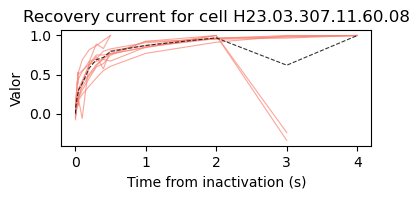

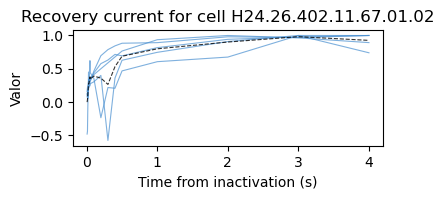

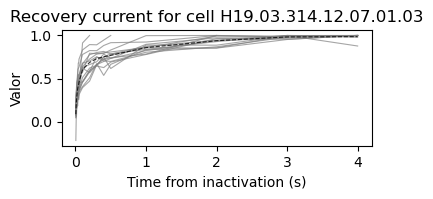

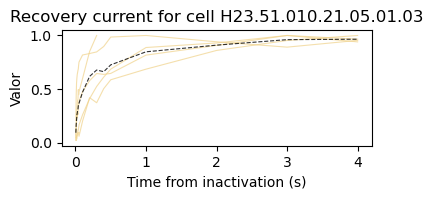

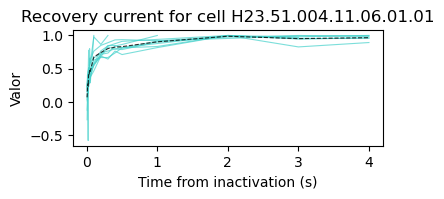

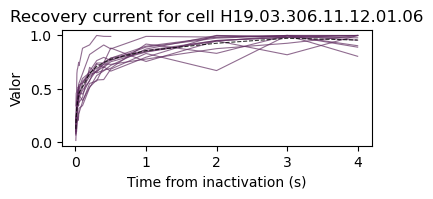

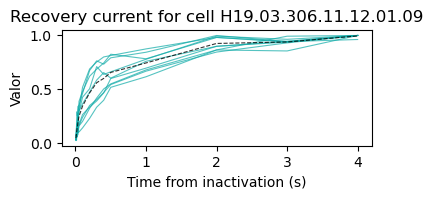

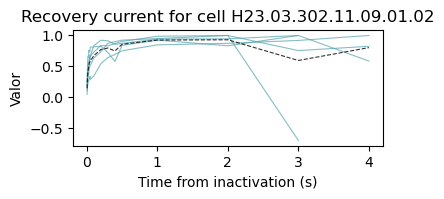

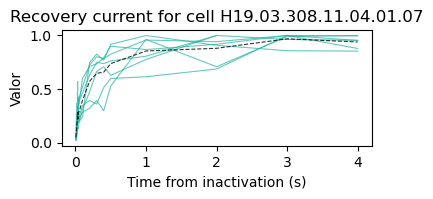

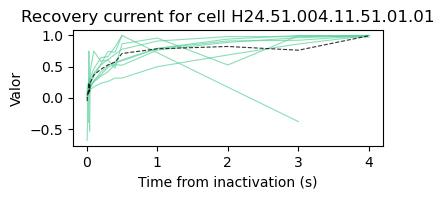

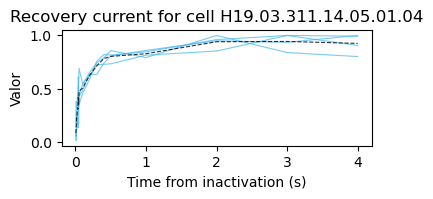

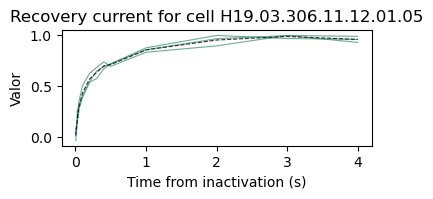

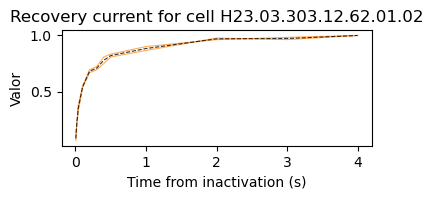

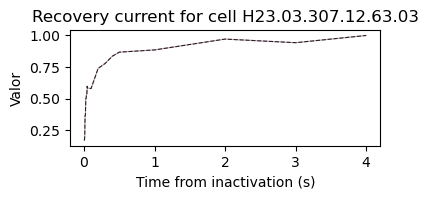

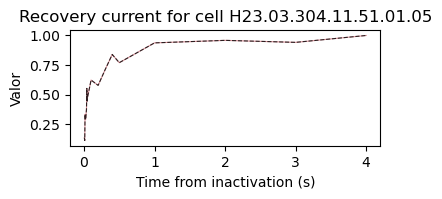

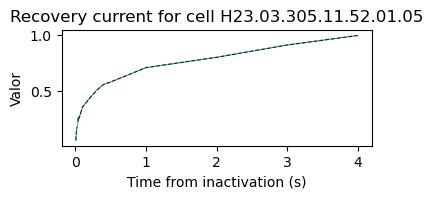

In [23]:
group = 'SEAAD_subclass_label.assignment'

times_str = [ '0.005', '0.01', '0.015', '0.02', '0.025', '0.03',
         '0.035', '0.04', '0.045', '0.05', '0.1', '0.2', '0.3',
         '0.4', '0.5', '1.0', '2.0', '3.0', '4.0']

times_float  = [float(i) for i in times_str]

average_recov_subclass = {}

for unique_group in unique_subclass:
    fig, ax = plt.subplots(figsize=(4,1.5))
    df_group = df_normalized_human[df_human[group] == unique_group]

    average_recov_subclass[unique_group] = df_group[times_str].mean(axis=0)

    
    for cell in df_group.index:
        plot_and_array_current_0(data = df_normalized_human, cell_index=cell, plot=True, group = group, alpha=0.7)
    plt.plot(times_float, average_recov_subclass[unique_group], color = 'black', alpha=0.8, linewidth=0.8, linestyle ='--')
    plt.show()

Text(0.5, 1.0, 'Mean normalized current by subclass')

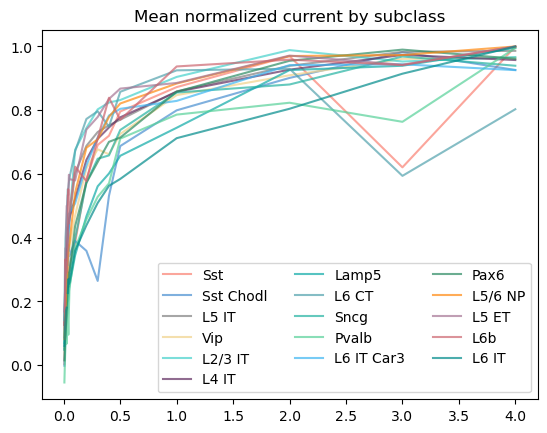

In [24]:
for unique_group in unique_subclass:
     plt.plot(times_float, average_recov_subclass[unique_group],
              color=color_dict[unique_group], alpha=0.7, label= f'{unique_group}')
     
plt.legend(ncol=3)
plt.title('Mean normalized current by subclass')
    

## Fitting recovery

### Plotting one cell to fit

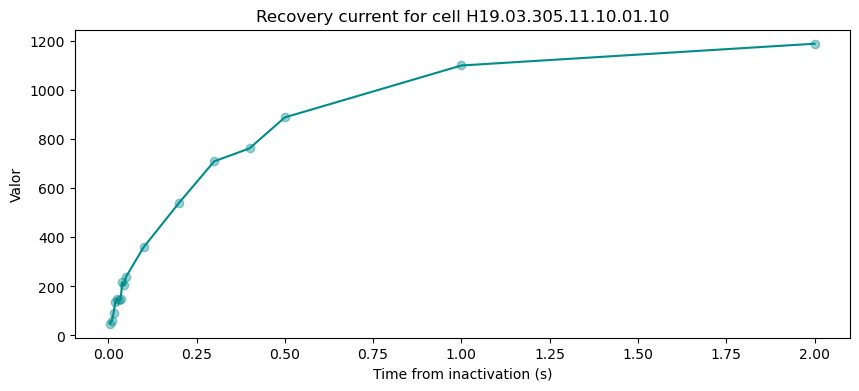

H19.03.305.11.10.01.10


In [25]:
#plot one cell and retrieve a list of the currents and time (useful for fitting later each cell)
def plot_and_array_current(cell_index, plot=False):
    
    if plot == True:
        plt.figure(figsize=(10,4))

    # Tiempo y corrientes para una celula
    list_times = []
    list_values = []

    # Bucle para recolectar datos y graficar los puntos
    for time in times:
        value = df_human[time][cell_index]
        if math.isnan(value):
            continue
        else:
            if plot == True:
                plt.scatter(float(time), value, color='darkcyan', alpha=0.4)  # Puntos
            list_times.append(float(time))
            list_values.append(value)
    
    if plot == True:
        # Conectar los puntos con líneas
        plt.plot(list_times, list_values, color='darkcyan') 

        # Mostrar gráfico
        plt.xlabel('Time from inactivation (s)')
        plt.ylabel('Valor')
        plt.title(f"Recovery current for cell {df_human['cell_name_label'][cell_index]}")
        plt.show()
        print(df_human['cell_name_label'][cell_index])
    
    return np.array(list_times), np.array(list_values)
    
plot_and_array_current(cell_index = 0, plot=True);


### Double exponential fitting params for one cell

A double exponential was used to fit the data. The article used one when the time of the experiment was around 400 ms, and a sum of two exponentials when the time was around 10 sec (to capture the slow one). Our time was 4s so used a double exponential.

In [26]:
# Sum of two exponentials
def double_exp_growth_saturation(t, A1, tau1, A2, tau2):
    return A1 * (1 - np.exp(-t / tau1)) + A2 * (1 - np.exp(-t / tau2))

In [27]:
# Params for double exponential
A_1 = []
A_2 = []
tau_1 = []
tau_2 = []

cell_index = 1 # Does not work with neurons that have weird datapoints, like #13

# Values for the fitting
list_times, list_values = plot_and_array_current(cell_index)

popt, pcov =curve_fit(double_exp_growth_saturation, list_times, list_values, p0=(1.5, 1.0, 2.0, 2.0))
A1_fit, tau1_fit, A2_fit, tau2_fit = popt
# # Generate fitted curve
y_fit = double_exp_growth_saturation(list_times, A1_fit, tau1_fit, A2_fit, tau2_fit)
r_2_double = r2_score(list_values, y_fit)

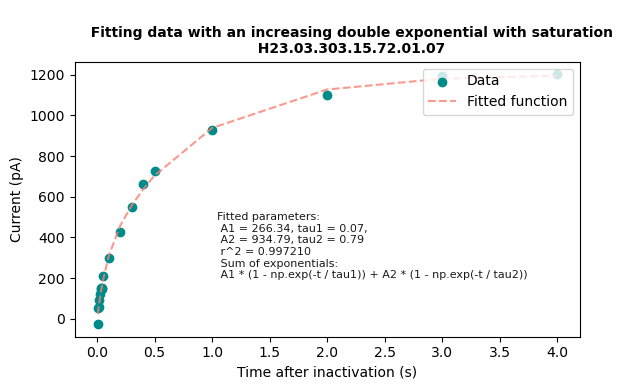


      1) H23.03.303.15.72.01.07
      Fitted parameters: 
      A1 = 266.338715, tau1 = 0.074284
      A2 = 934.786300, tau2 = 0.788700
      r^2 = 0.997210


In [28]:
# Plot the data and the fit
plt.figure(figsize=(6, 4))
plt.scatter(list_times, list_values, label='Data', color='darkcyan')
plt.plot(list_times, y_fit, label='Fitted function', color='salmon', linestyle='--', alpha=0.8)
plt.xlabel('Time after inactivation (s)')
plt.ylabel('Current (pA)')
plt.title(f"""
          Fitting data with an increasing double exponential with saturation
          {df_human['cell_name_label'][cell_index]}""",
          fontdict={'weight':'demibold', 'size':10})

plt.text(0.8,200,f"""        Fitted parameters: 
         A1 = {A1_fit:.2f}, tau1 = {tau1_fit:.2f},
         A2 = {A2_fit:.2f}, tau2 = {tau2_fit:.2f}
         r^2 = {r_2_double:.6f}
         Sum of exponentials:
         A1 * (1 - np.exp(-t / tau1)) + A2 * (1 - np.exp(-t / tau2))""",
         fontsize=8, color='black', alpha=0.9)

plt.legend(loc='upper right')

plt.tight_layout()
plt.savefig(f"../results/recov_inact_doub_fitting_{df_human['cell_name_label'][cell_index]}.png", dpi=300)
plt.show()

# Print fitted parameters
print(f"""
      {cell_index}) {df_human['cell'][cell_index]}
      Fitted parameters: 
      A1 = {A1_fit:.6f}, tau1 = {tau1_fit:.6f}
      A2 = {A2_fit:.6f}, tau2 = {tau2_fit:.6f}
      r^2 = {r_2_double:.6f}""")


### Double exponential fitting params for all human cells.

In [29]:
# Params for double exponential
A_1 = []
A_2 = []
tau_1 = []
tau_2 = []
r_2_double = []

for cell in range(df_human.shape[0]): #df_human.shape[0]
    # Values for the fitting
    list_times, list_values = plot_and_array_current(cell_index = cell)
    
    try: #Some values like cell 13 did not fit well.
        popt, pcov =curve_fit(double_exp_growth_saturation, list_times, list_values, p0=(1.5, 1.0, 2.0, 2.0))
        A1_fit, tau1_fit, A2_fit, tau2_fit = popt
    
    except:
        A1_fit, tau1_fit, A2_fit, tau2_fit = np.nan, np.nan, np.nan, np.nan
        
    A_1.append(A1_fit)
    tau_1.append(tau1_fit)
    
    A_2.append(A2_fit)
    tau_2.append(tau2_fit)
    # # Generate fitted curve
    y_fit = double_exp_growth_saturation(list_times, A1_fit, tau1_fit, A2_fit, tau2_fit)
    # r_2_double.append()
    try:
        r_2_double.append(r2_score(list_values, y_fit))
    except:
        r_2_double.append(np.nan)
    # print(cell, ') ', df_human['cell'][cell], A1_fit, tau1_fit)

#

c:\Users\maria.vergara\AppData\Local\anaconda3\envs\IVSCC\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\maria.vergara\AppData\Local\Temp\ipykernel_11704\4098580352.py:3: RuntimeWarning: overflow encountered in exp
  return A1 * (1 - np.exp(-t / tau1)) + A2 * (1 - np.exp(-t / tau2))
c:\Users\maria.vergara\AppData\Local\anaconda3\envs\IVSCC\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\maria.vergara\AppData\Local\Temp\ipykernel_11704\4098580352.py:3: RuntimeWarning: overflow encountered in exp
  return A1 * (1 - np.exp(-t / tau1)) + A2 * (1 - np.exp(-t / tau2))
C:\Users\maria.vergara\AppData\Local\Temp\ipykernel_11704\4098580352.py:3: RuntimeWarning: overflow encountered in exp
  r

In [30]:
df_human['tau_1'] = tau_1
df_human['tau_2'] = tau_2
df_human['A_1'] = A_1
df_human['A_2'] =A_2
df_human['r2_double'] = r_2_double

In [31]:
df_human['tau_1'][cell_index], df_human['tau_2'][cell_index], cell_index

(0.07428421923327498, 0.788700043492805, 1)

In [32]:
# single exponential
def single_exp_growth_saturation(t, A0, tau0):
    return A0 * (1 - np.exp(-t / tau0))


In [33]:
# Params for single exponential
A_0 = []
tau_0 = []

# Values for the fitting
list_times, list_values = plot_and_array_current(cell_index)

popt0, pcov0 = curve_fit(single_exp_growth_saturation, list_times, list_values, p0=(1.5, 2.0))
A0_fit, tau0_fit = popt0
# # Generate fitted curve
y0_fit = single_exp_growth_saturation(list_times, A0_fit, tau0_fit)
r_2_single = r2_score(list_values, y0_fit)


### Single exponential fitting params for one cell

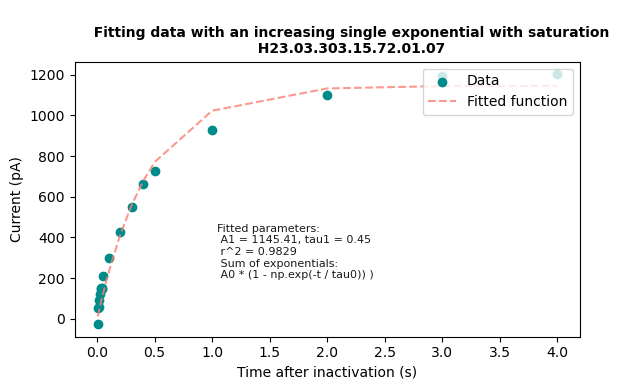


      1) H23.03.303.15.72.01.07
      Fitted parameters: 
      A0 = 1145.406686, tau0 = 0.447327
      r^2 = 0.982859


In [34]:
# Plot the data and the fit
plt.figure(figsize=(6, 4))
plt.scatter(list_times, list_values, label='Data', color='darkcyan')
plt.plot(list_times, y0_fit, label='Fitted function', color='salmon', linestyle='--', alpha=0.8)
plt.xlabel('Time after inactivation (s)')
plt.ylabel('Current (pA)')
plt.title(f"""
          Fitting data with an increasing single exponential with saturation
          {df_human['cell_name_label'][cell_index]}""",
          fontdict={'weight':'demibold', 'size':10})

plt.text(0.8,200,f"""        Fitted parameters: 
         A1 = {A0_fit:.2f}, tau1 = {tau0_fit:.2f}
         r^2 = {r_2_single:.4f}
         Sum of exponentials:
         A0 * (1 - np.exp(-t / tau0)) )""",
         fontsize=8, color='black', alpha=0.9)

plt.legend(loc='upper right')

plt.tight_layout()
plt.savefig(f"../results/recov_inact_sing_fitting_{df_human['cell_name_label'][cell_index]}.png", dpi=300)
plt.show()

# Print fitted parameters
print(f"""
      {cell_index}) {df_human['cell'][cell_index]}
      Fitted parameters: 
      A0 = {A0_fit:.6f}, tau0 = {tau0_fit:.6f}
      r^2 = {r_2_single:.6f}""")


### Single exponential fitting params for all human cells.

In [35]:
# Params for single exponential
A_0 = []
tau_0 = []
r_2_single = []

for cell in range(df_human.shape[0]): #df_human.shape[0]
    # Values for the fitting
    list_times, list_values = plot_and_array_current(cell_index = cell)
    
    try: #Some values like cell 13 did not fit well.
        popt0, pcov0 =curve_fit(single_exp_growth_saturation, list_times, list_values, p0=(1.5, 2.0))
        A0_fit, tau0_fit = popt0
    
    except:
        A0_fit, tau0_fit = np.nan, np.nan
        
    A_0.append(A0_fit)
    tau_0.append(tau0_fit)
    
    # # Generate fitted curve
    y0_fit = single_exp_growth_saturation(list_times, A0_fit, tau0_fit)
    # r_2_double.append()
    try:
        r_2_single.append(r2_score(list_values, y0_fit))
    except:
        r_2_single.append(np.nan)
    # print(cell, ') ', df_human['cell'][cell], A1_fit, tau1_fit)

#

C:\Users\maria.vergara\AppData\Local\Temp\ipykernel_11704\1643350809.py:3: RuntimeWarning: overflow encountered in exp
  return A0 * (1 - np.exp(-t / tau0))
C:\Users\maria.vergara\AppData\Local\Temp\ipykernel_11704\1643350809.py:3: RuntimeWarning: overflow encountered in exp
  return A0 * (1 - np.exp(-t / tau0))
C:\Users\maria.vergara\AppData\Local\Temp\ipykernel_11704\1643350809.py:3: RuntimeWarning: overflow encountered in exp
  return A0 * (1 - np.exp(-t / tau0))
C:\Users\maria.vergara\AppData\Local\Temp\ipykernel_11704\1643350809.py:3: RuntimeWarning: overflow encountered in exp
  return A0 * (1 - np.exp(-t / tau0))
C:\Users\maria.vergara\AppData\Local\Temp\ipykernel_11704\1643350809.py:3: RuntimeWarning: overflow encountered in exp
  return A0 * (1 - np.exp(-t / tau0))
C:\Users\maria.vergara\AppData\Local\Temp\ipykernel_11704\1643350809.py:3: RuntimeWarning: overflow encountered in exp
  return A0 * (1 - np.exp(-t / tau0))
c:\Users\maria.vergara\AppData\Local\anaconda3\envs\IVSCC\

In [36]:
df_human['tau_0'] = tau_0
df_human['A_0'] = A_0
df_human['r2_single'] = r_2_single

In [37]:
df_human['tau_0'][cell_index], df_human['r2_single'][cell_index], df_human['r2_double'][cell_index]

(0.44732747873409345, 0.9828588703871456, 0.997209786362233)

89 of the cells are better fitted (higher r^2) with double exponential than single

In [38]:
print(f"{sum(df_human['r2_double']>df_human['r2_single'])} of the cells are better fitted (higher r^2) with double exponential than single")

89 of the cells are better fitted (higher r^2) with double exponential than single


### Comparing tau between subclass

In [39]:
str(df_human['tau_1'][13]) == 'nan'

True

#### Double exponential params comparison between classes

Text(0.5, 1.0, 'tau_1 for human cell subclasses')

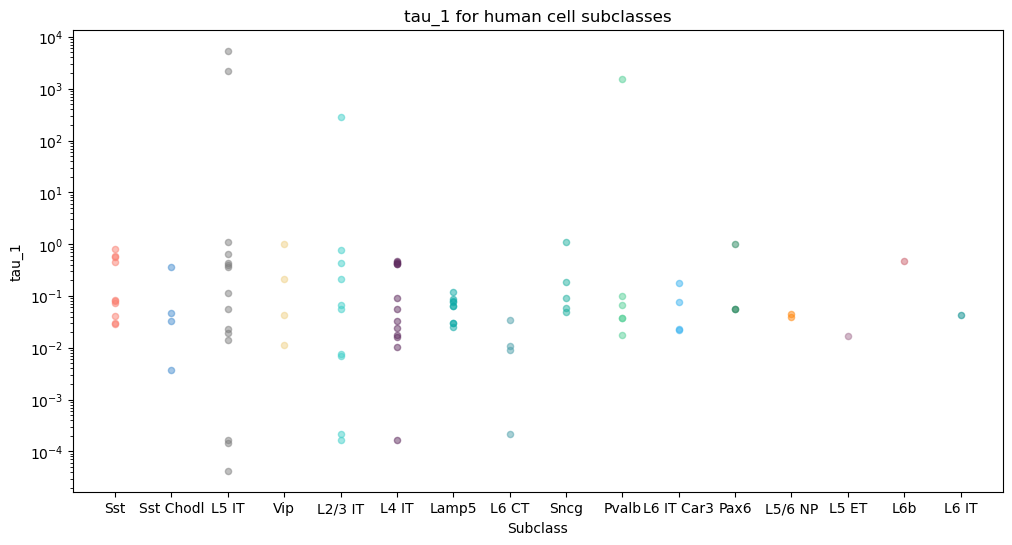

In [40]:
feature = 'tau_1'
plt.figure(figsize=(12,6))
for cell in range(df_human.shape[0]): #df_human.shape[0]
    if str(df_human[feature][cell]) != 'nan':
        cell_subclass = df_human['SEAAD_subclass_label.assignment'][cell]
        plt.scatter(cell_subclass, df_human[feature][cell], color = color_dict[cell_subclass], s=20, alpha=0.5)
plt.yscale('log')
plt.ylabel(feature)
plt.xlabel("Subclass")
plt.title(f"{feature} for human cell subclasses")

Text(0.5, 1.0, 'tau_2 for human cell subclasses')

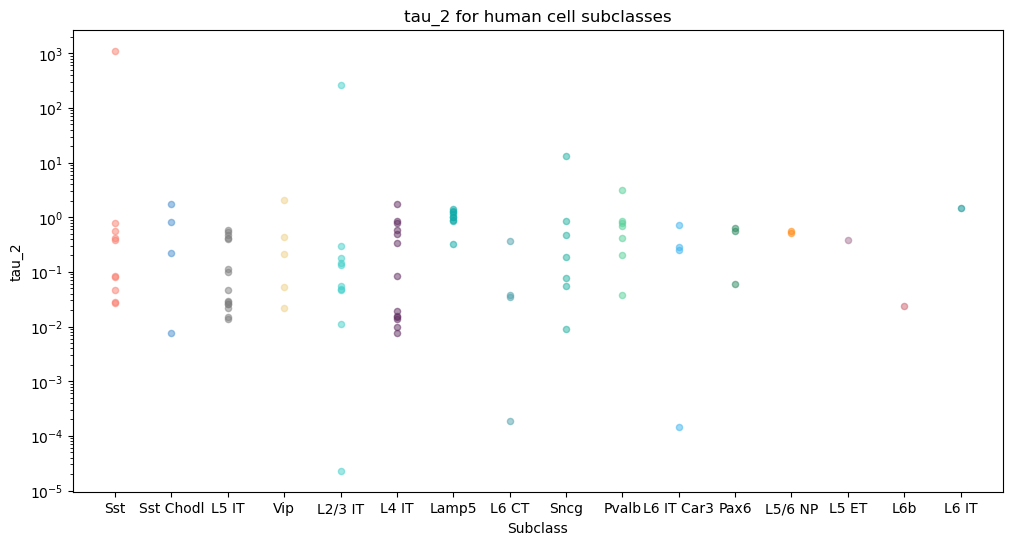

In [41]:
feature = 'tau_2'
plt.figure(figsize=(12,6))
for cell in range(df_human.shape[0]): #df_human.shape[0]
    if str(df_human[feature][cell]) != 'nan':
        cell_subclass = df_human['SEAAD_subclass_label.assignment'][cell]
        plt.scatter(cell_subclass, df_human[feature][cell], color = color_dict[cell_subclass], s=20, alpha=0.5)
plt.yscale('log')
plt.ylabel(feature)
plt.xlabel("Subclass")
plt.title(f"{feature} for human cell subclasses")

In [42]:
sum(df_human['tau_1']> df_human['tau_2']), sum(df_human['A_1']> df_human['A_2'])
df_human[['tau_1','tau_2','A_1','A_2']]

,tau_1,tau_2,A_1,A_2
0,0.030118,0.413714,136.451951,1059.582281
1,0.074284,0.788700,266.338715,934.786300
2,0.032182,0.223036,98.964961,279.197112
3,0.000144,0.418984,167.696449,455.635626
4,-29010.573200,0.052148,-916794.960986,176.562499
...,...,...,...,...
94,0.014017,0.470041,222.468136,341.795496
95,0.092057,13.402371,213.515422,1216.648349
96,0.038178,0.418361,584.833888,1635.060021
97,0.185470,0.185460,340.709529,1239.711555


Text(0.5, 1.0, 'Taus for human cell subclasses (each cell two data points - fast and slow tau)')

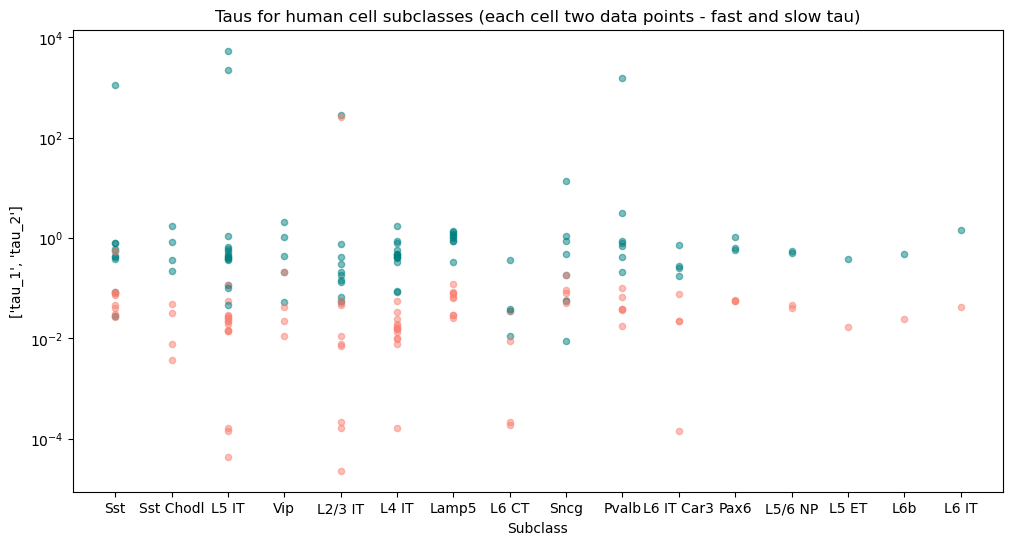

In [43]:
# use biggest tau from exponential
feature = ['tau_1','tau_2']

plt.figure(figsize=(12,6))
for cell in range(df_human.shape[0]): #df_human.shape[0]
    if (str(df_human[feature[0]][cell]) != 'nan') and (str(df_human[feature[1]][cell]) != 'nan'):
        cell_subclass = df_human['SEAAD_subclass_label.assignment'][cell]
        
        if df_human[feature[0]][cell]>df_human[feature[1]][cell]:
            plt.scatter(cell_subclass, df_human[feature[0]][cell], color = 'teal', 
                        s=20, alpha=0.5, label= 'Slow')
            plt.scatter(cell_subclass, df_human[feature[1]][cell], color = 'salmon', 
                        s=20, alpha=0.5, label='Fast')
        else:
            plt.scatter(cell_subclass, df_human[feature[1]][cell], color = 'teal', 
                        s=20, alpha=0.5)
            plt.scatter(cell_subclass, df_human[feature[0]][cell], color = 'salmon', 
                        s=20, alpha=0.5)
            
plt.yscale('log')
plt.ylabel(feature)
plt.xlabel("Subclass")
# plt.legend()
plt.title(f"Taus for human cell subclasses (each cell two data points - fast and slow tau)")